In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('BikeRentalData.csv')
df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,108,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,81,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,83,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,48,61


In [3]:
# Check column names and basic info
print(df.columns)

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'registered', 'cnt'],
      dtype='object')


In [4]:
target_col = 'cnt' 

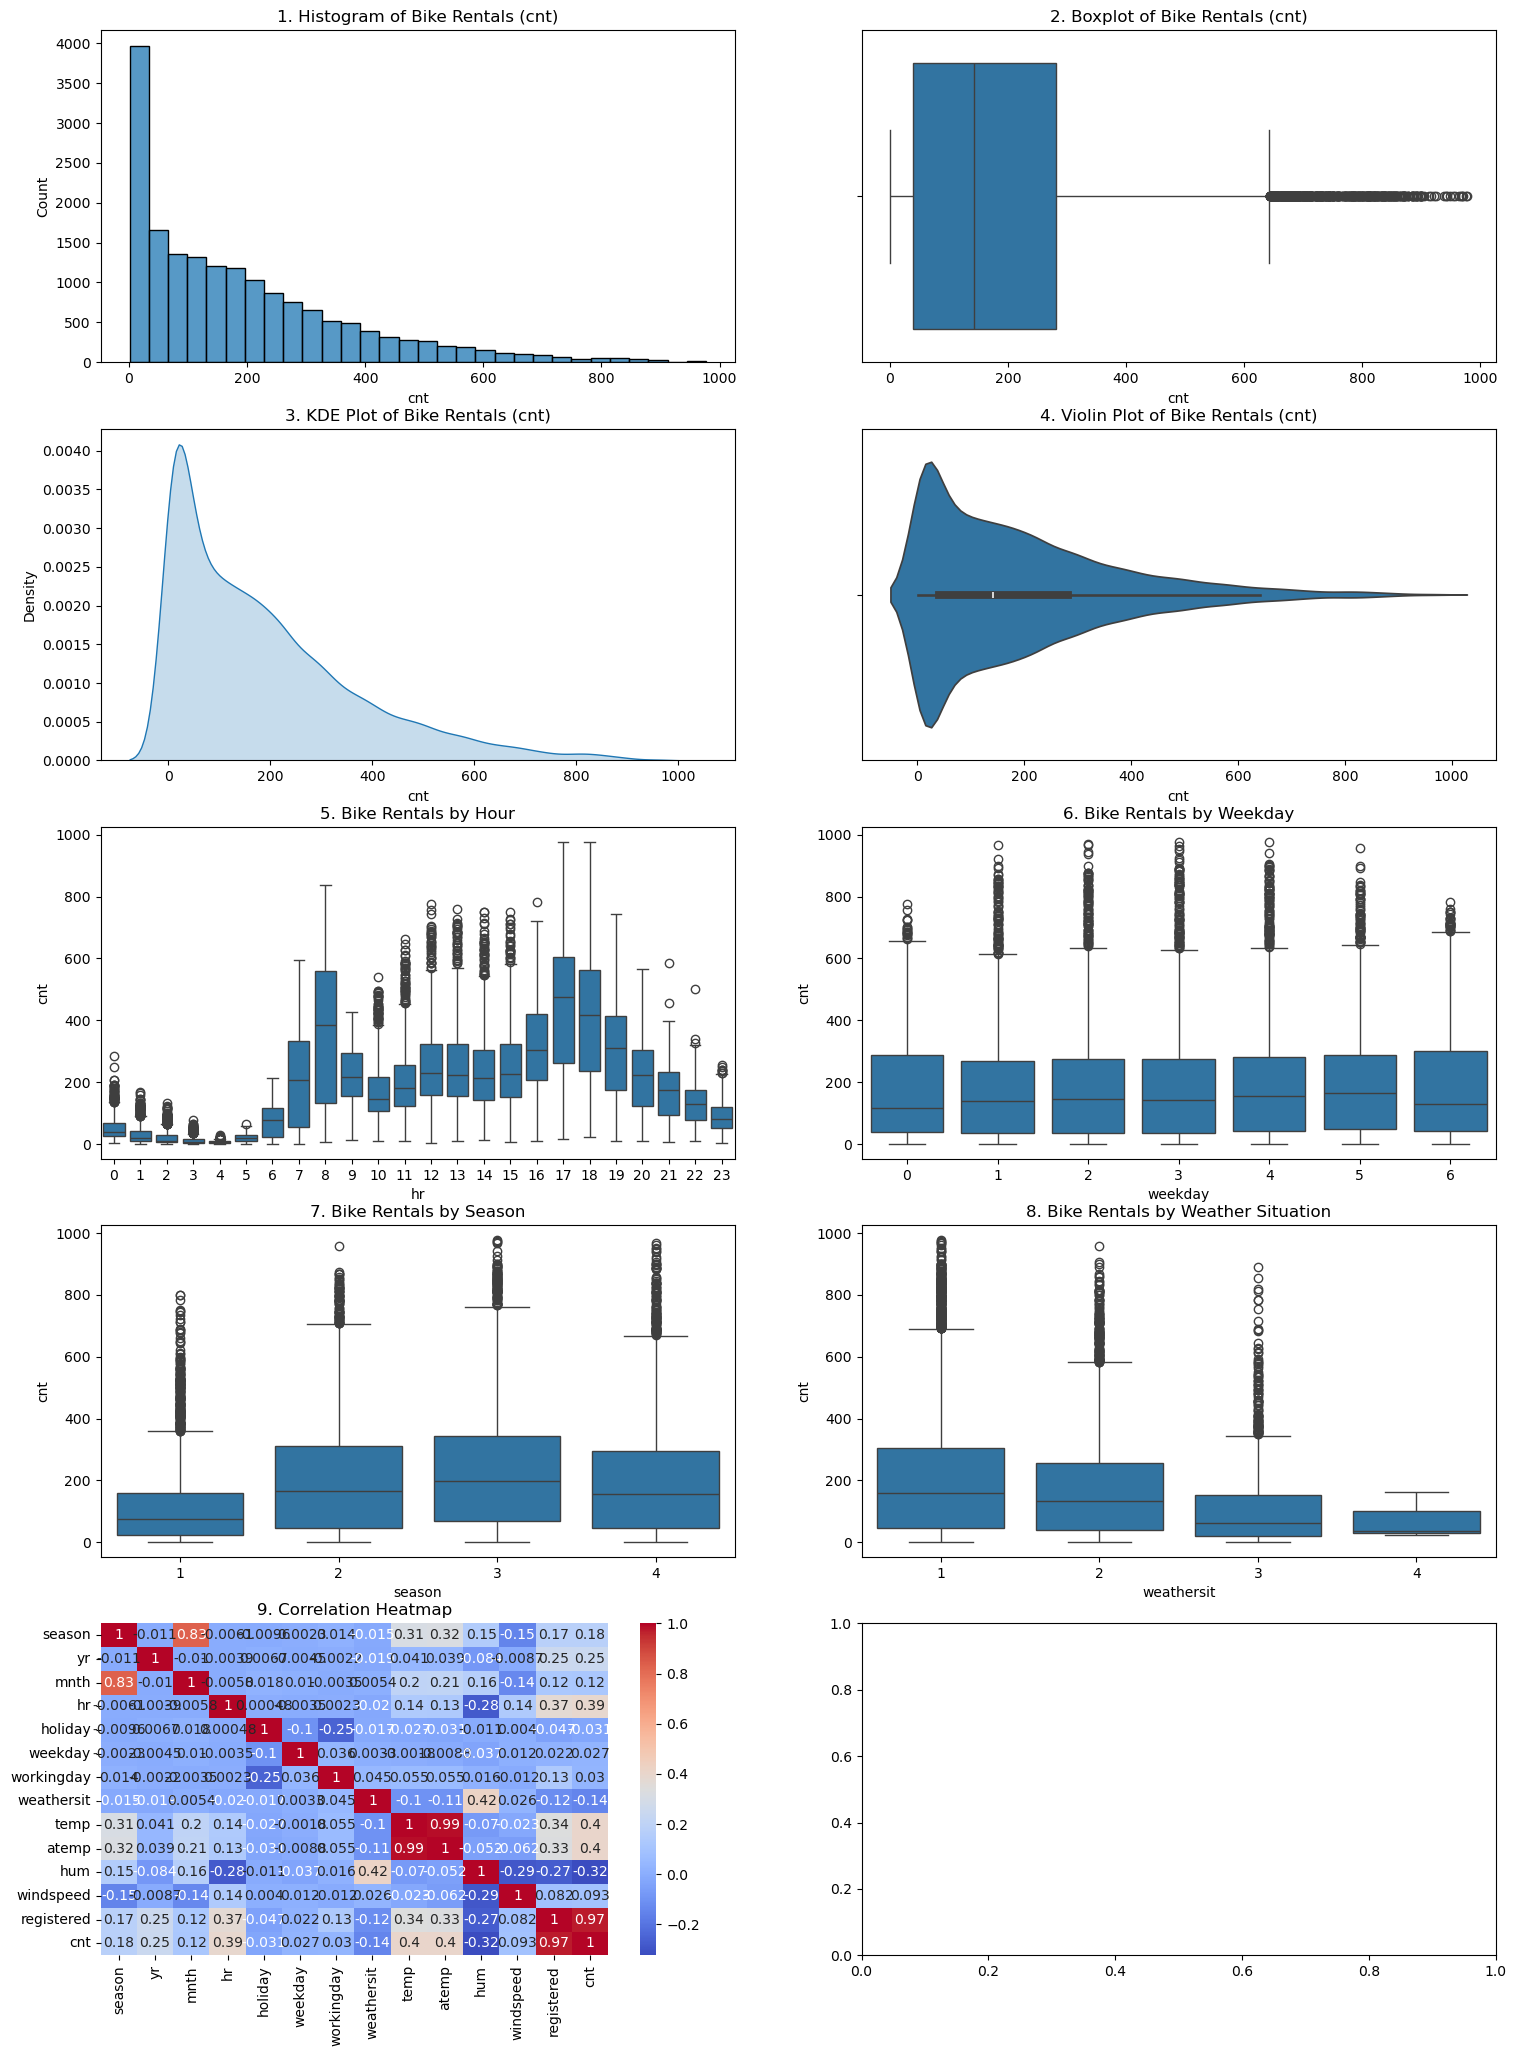

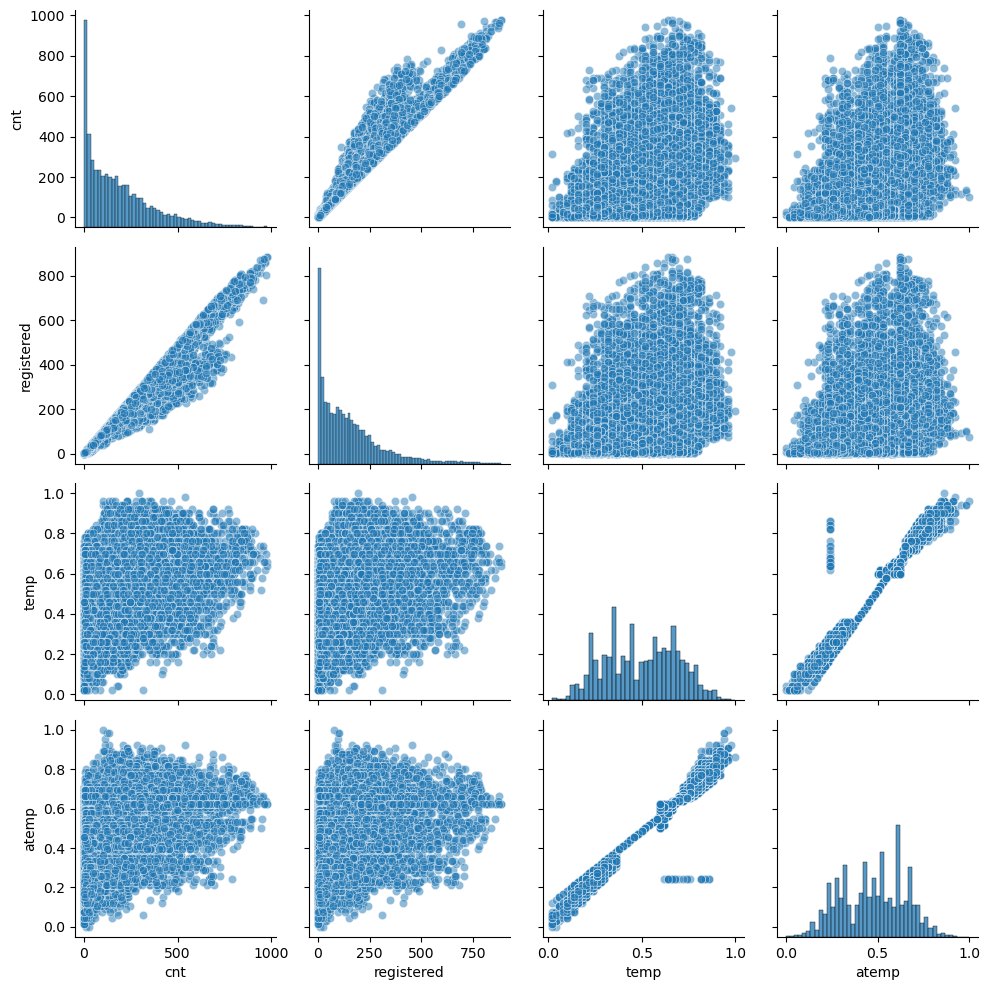

In [5]:
# Ensure 'cnt' is numeric
df['cnt'] = pd.to_numeric(df['cnt'], errors='coerce')

# Drop rows where 'cnt' is NaN
df = df.dropna(subset=['cnt'])

# Re-plot the first 9 graphs after cleanup
fig, axes = plt.subplots(5, 2, figsize=(18, 25))
axes = axes.flatten()

# 1. Histogram
sns.histplot(df['cnt'], kde=False, bins=30, ax=axes[0])
axes[0].set_title("1. Histogram of Bike Rentals (cnt)")

# 2. Boxplot
sns.boxplot(x=df['cnt'], ax=axes[1])
axes[1].set_title("2. Boxplot of Bike Rentals (cnt)")

# 3. KDE plot
sns.kdeplot(x=df['cnt'], ax=axes[2], fill=True)
axes[2].set_title("3. KDE Plot of Bike Rentals (cnt)")

# 4. Violin plot
sns.violinplot(x=df['cnt'], ax=axes[3])
axes[3].set_title("4. Violin Plot of Bike Rentals (cnt)")

# 5. cnt vs hour (if exists)
if 'hr' in df.columns:
    sns.boxplot(x='hr', y='cnt', data=df, ax=axes[4])
    axes[4].set_title("5. Bike Rentals by Hour")
else:
    axes[4].set_visible(False)

# 6. cnt vs weekday (if exists)
if 'weekday' in df.columns:
    sns.boxplot(x='weekday', y='cnt', data=df, ax=axes[5])
    axes[5].set_title("6. Bike Rentals by Weekday")
else:
    axes[5].set_visible(False)

# 7. cnt vs season
if 'season' in df.columns:
    sns.boxplot(x='season', y='cnt', data=df, ax=axes[6])
    axes[6].set_title("7. Bike Rentals by Season")
else:
    axes[6].set_visible(False)

# 8. cnt vs weather
if 'weathersit' in df.columns:
    sns.boxplot(x='weathersit', y='cnt', data=df, ax=axes[7])
    axes[7].set_title("8. Bike Rentals by Weather Situation")
else:
    axes[7].set_visible(False)

# 9. Correlation heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[8])
axes[8].set_title("9. Correlation Heatmap")

# 10. Will be generated separately due to layout (pairplot)
top_corr_features = corr['cnt'].abs().sort_values(ascending=False)[1:4].index.tolist()
sns.pairplot(df, vars=['cnt'] + top_corr_features, plot_kws={'alpha': 0.5})

plt.tight_layout()
plt.show()


Correlation with target:
 registered    0.972151
temp          0.404772
atemp         0.400929
hr            0.394071
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
dtype: float64


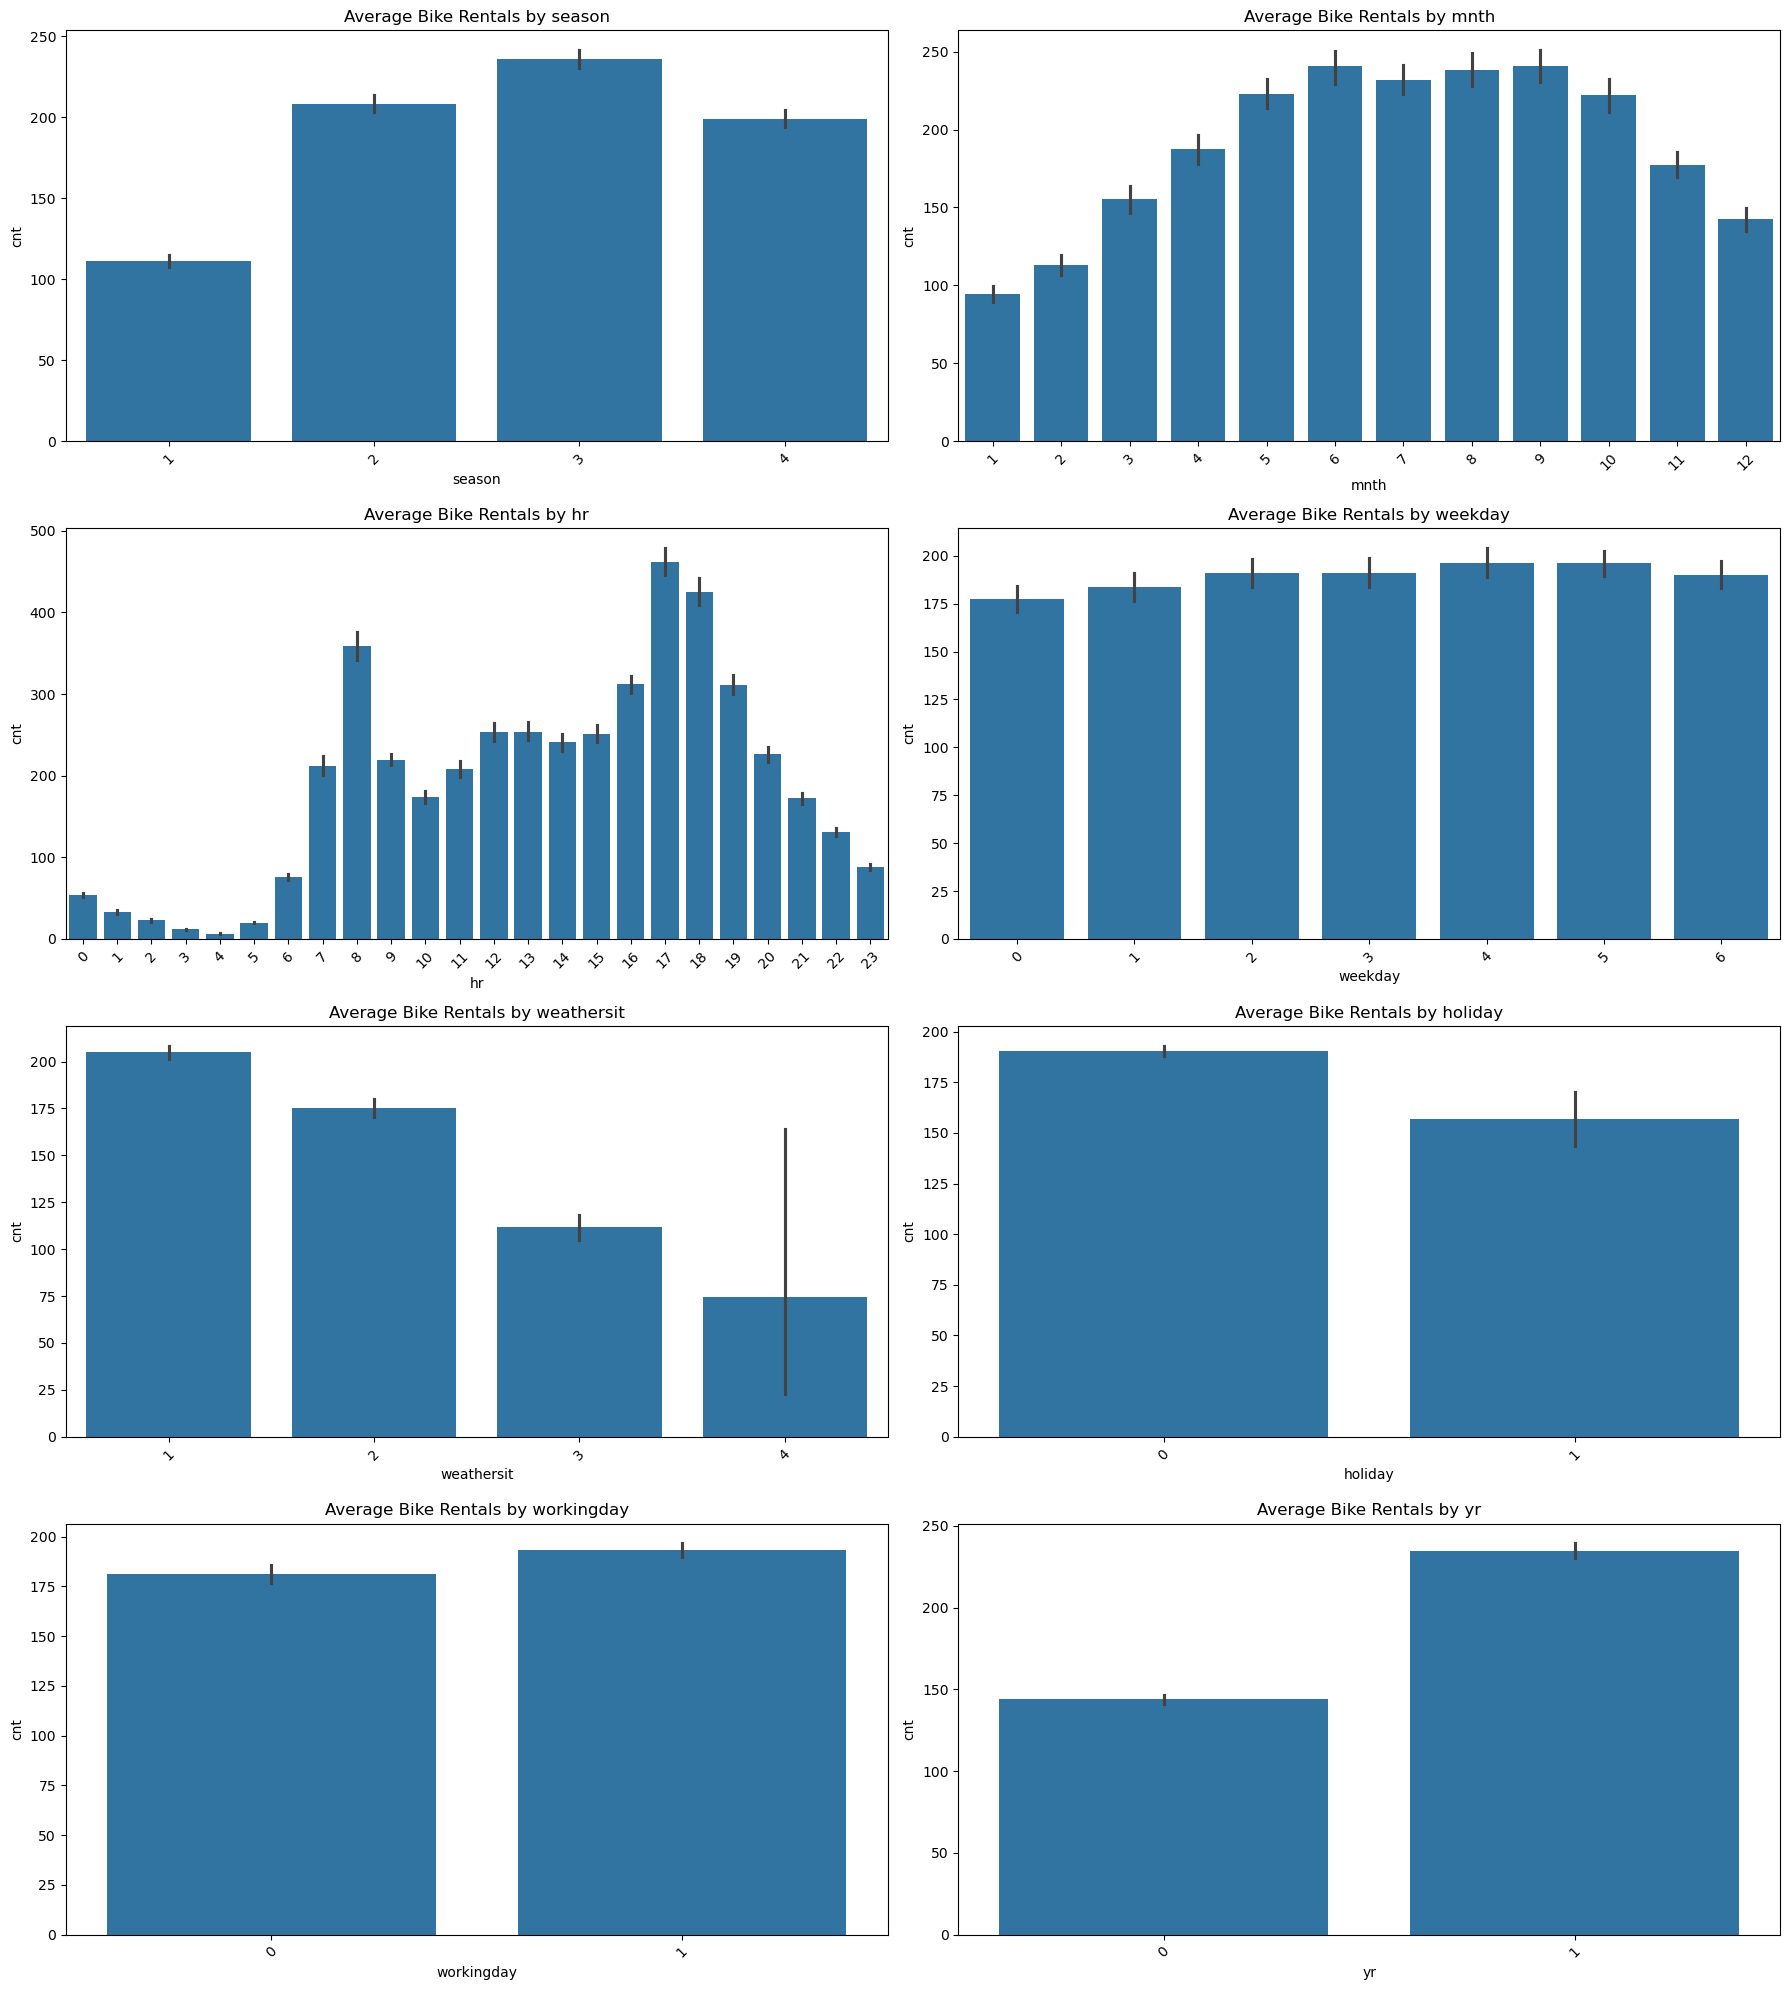

In [6]:

# 1. Correlation of numerical features with target
numerical_cols = df.select_dtypes(include='number').columns.drop('cnt')
correlations = df[numerical_cols].corrwith(df['cnt']).sort_values(key=abs, ascending=False)
print("Correlation with target:\n", correlations.sort_values
      (ascending=False))

cols = ['season', 'mnth', 'hr', 'weekday', 'weathersit', 'holiday', 'workingday', 'yr']

# Plot mean 'cnt' for each category
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 20))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.barplot(x=col, y='cnt', data=df, ax=axes[i])
    axes[i].set_title(f'Average Bike Rentals by {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [7]:
print("Dataset shape:", df.shape)

Dataset shape: (17379, 14)


In [8]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  registered  17379 non-null  int64  
 13  cnt         17379 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 1.9 MB
None


In [9]:
print("\nSummary statistics:")
df.describe()


Summary statistics:


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,886.000000,977.000000


In [10]:
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
registered    0
cnt           0
dtype: int64

In [11]:
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 2


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())

In [14]:
# Drop constant columns
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
df.drop(columns=constant_cols, inplace=True)
print("Dropped constant columns:", constant_cols)


Dropped constant columns: []


In [15]:
df.drop(columns=['atemp', 'registered'], inplace=True)
print("Dropped columns: ['atemp', 'registered']")


Dropped columns: ['atemp', 'registered']


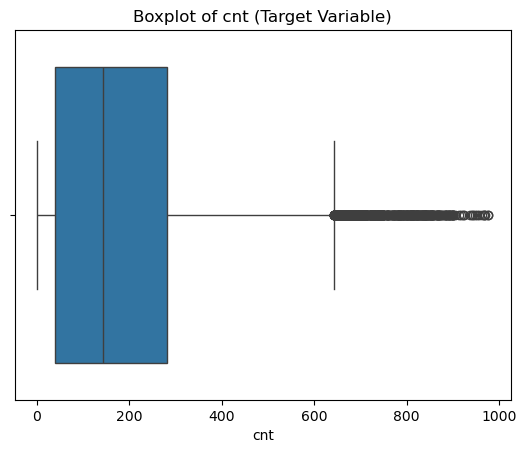

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Check distribution of the target variable again
sns.boxplot(x=df['cnt'])
plt.title('Boxplot of cnt (Target Variable)')
plt.show()


In [17]:
# Function to cap outliers using IQR method
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.where(series < lower, lower,
           np.where(series > upper, upper, series))

# Apply to key numerical features
columns_to_check = ['cnt', 'temp', 'hum', 'windspeed']

for col in columns_to_check:
    df[col] = cap_outliers(df[col])

print("Outliers capped in columns:", columns_to_check)


Outliers capped in columns: ['cnt', 'temp', 'hum', 'windspeed']


In [18]:
missing = df.isnull().sum()
print("Missing values per column:\n", missing[missing > 0])


Missing values per column:
 Series([], dtype: int64)


In [19]:
# Compute absolute correlations with the target variable 'cnt'
target_corr = df.corr(numeric_only=True)['cnt'].abs().sort_values(ascending=False)

# Display correlation values
print("Correlation with 'cnt':\n", target_corr)

# Set a threshold for "strong" correlation (commonly 0.3 or 0.5)
threshold = 0.3
strong_features = target_corr[target_corr >= threshold].index.tolist()

# Remove 'cnt' itself from the list
strong_features.remove('cnt')

print("\nSelected features based on threshold (>|0.3|):", strong_features)


Correlation with 'cnt':
 cnt           1.000000
temp          0.411161
hr            0.404927
hum           0.329886
yr            0.246359
season        0.179856
weathersit    0.144531
mnth          0.121374
windspeed     0.100824
holiday       0.029752
weekday       0.028136
workingday    0.022550
Name: cnt, dtype: float64

Selected features based on threshold (>|0.3|): ['temp', 'hr', 'hum']


In [20]:
print(df.dtypes)

season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
cnt           float64
dtype: object


In [21]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

In [22]:
X = df.drop('cnt', axis=1)
y = df['cnt']

In [23]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [24]:
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
print("Cross-validation R² scores:", scores)
print("Average R² score:", np.mean(scores))

Cross-validation R² scores: [0.40366967 0.41017226 0.37510496 0.40781046 0.39664301]
Average R² score: 0.3986800723015477


In [26]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [28]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Cross-validation results
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    results[name] = {
        'Mean R²': np.mean(scores),
        'Scores': scores
    }

# Display results
for name, res in results.items():
    print(f"{name}: Mean R² = {res['Mean R²']:.3f}, Scores = {res['Scores']}\n")

Linear Regression: Mean R² = 0.266, Scores = [0.19750397 0.28739427 0.20301837 0.30854348 0.33567309]

Decision Tree: Mean R² = 0.685, Scores = [0.48646358 0.82189386 0.42156295 0.85292567 0.84450958]

Random Forest: Mean R² = 0.800, Scores = [0.62259145 0.87287313 0.71232585 0.88928712 0.90123451]

Gradient Boosting: Mean R² = 0.767, Scores = [0.58447798 0.85892937 0.80400808 0.81324672 0.77391064]



In [29]:
from sklearn.model_selection import train_test_split
import joblib


In [31]:

# Step 1: Split data into train and test sets (for final evaluation)
X = df.drop('cnt', axis=1)
y = df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the Random Forest model
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)

# Step 3: Save the model using joblib
joblib.dump(best_model, 'random_forest_model.pkl')

print(" Random Forest model trained and saved as 'random_forest_model.pkl'")


 Random Forest model trained and saved as 'random_forest_model.pkl'
